* Bipartite graph

    - Take nodeset and partition to two groups
    - Edges never exist between nodes of same partition

- teams - players
- companies - customers
- games - players
- teachers - students

In [1]:
import networkx as nx
from custom import load_data as cf
from networkx.algorithms import bipartite
from nxviz import CircosPlot
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

![bipartite graph](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/Simple-bipartite-graph.svg/600px-Simple-bipartite-graph.svg.png)

In [2]:
G = cf.load_crime_network()
list(G.edges(data=True))[0:5]

[('p1', 'c1', {'role': 'Suspect'}),
 ('p1', 'c2', {'role': 'Victim'}),
 ('p1', 'c3', {'role': 'Victim'}),
 ('p1', 'c4', {'role': 'Suspect'}),
 ('c1', 'p756', {'role': 'Suspect'})]

In [3]:
list(G.nodes(data=True))[0:10]

[('p1', {'bipartite': 'person', 'gender': 1}),
 ('c1', {'bipartite': 'crime'}),
 ('c2', {'bipartite': 'crime'}),
 ('c3', {'bipartite': 'crime'}),
 ('c4', {'bipartite': 'crime'}),
 ('p2', {'bipartite': 'person', 'gender': 1}),
 ('c5', {'bipartite': 'crime'}),
 ('c6', {'bipartite': 'crime'}),
 ('c7', {'bipartite': 'crime'}),
 ('c8', {'bipartite': 'crime'})]

In [4]:
person_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'person']
pG = bipartite.projection.projected_graph(G, person_nodes)
list(pG.nodes(data=True))[0:5]

[('p1', {'bipartite': 'person', 'gender': 1}),
 ('p2', {'bipartite': 'person', 'gender': 1}),
 ('p3', {'bipartite': 'person', 'gender': 1}),
 ('p4', {'bipartite': 'person', 'gender': 1}),
 ('p5', {'bipartite': 'person', 'gender': 1})]

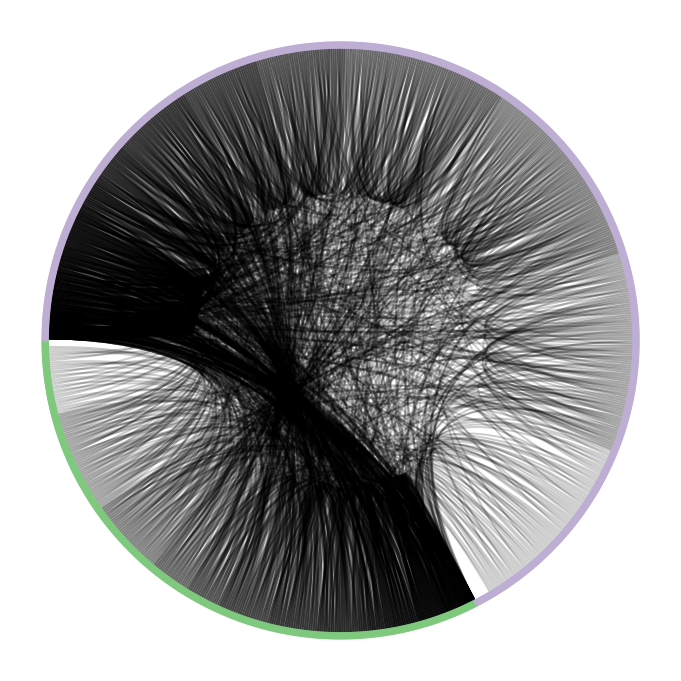

In [5]:
for n, d in pG.nodes(data=True):
    pG.node[n]['connectivity'] = len(list(pG.neighbors(n)))
c = CircosPlot(pG, node_color='gender', node_grouping='gender', node_order='connectivity')
c.draw()
plt.savefig('images/crime-person.png', dpi=300)

In [6]:
crime_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'crime']
cG = bipartite.projection.projected_graph(G, crime_nodes)

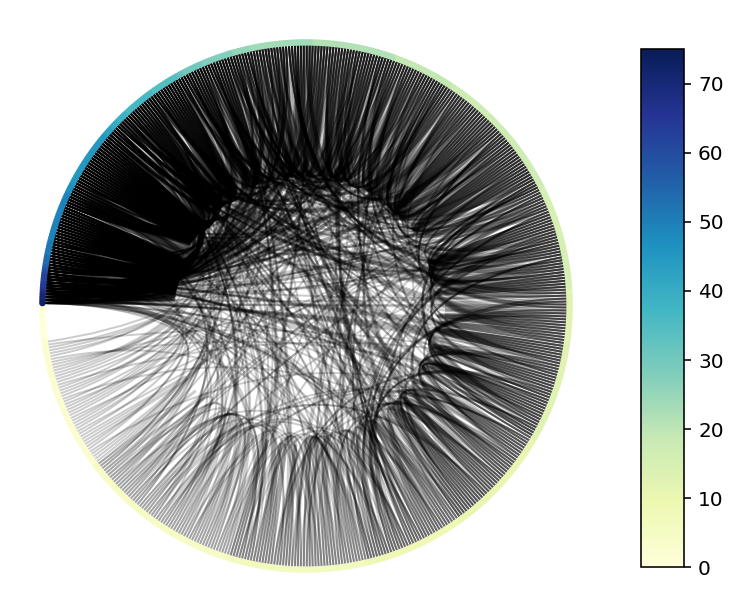

In [7]:
for n in cG.nodes():
    cG.node[n]['connectivity'] = float(len(list(cG.neighbors(n))))
c = CircosPlot(cG, node_order='connectivity', node_color='connectivity')
c.draw()
plt.savefig('images/crime-crime.png', dpi=300)

In [8]:
# Degree Centrality
bpdc = bipartite.degree_centrality(G, person_nodes)
sorted(bpdc.items(), key=lambda x: x[1], reverse=True)[0:5]

[('p815', 0.045372050816696916),
 ('p2', 0.039927404718693285),
 ('p425', 0.032667876588021776),
 ('p220', 0.0308529945553539),
 ('p56', 0.025408348457350273)]

In [9]:
nx.degree_centrality(G)['p1']

0.0029006526468455403

- degree centrality - number of nodes the node has / number of nodes the node could possibly have